<a href="https://colab.research.google.com/github/dcw8161/Projects/blob/main/Redcross_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Feature Description**

1. ID:
the unique identifier for each constituent

2. ZIPCODE:
the ZIP code for the constituent

3. AGE:
the age of the constituent

4. MARITAL_STATUS:
the marital status of the constituent

5. GENDER:
the gender of the constituent

6. MEMBERSHIP_IND:
a binary flag indicating if a constituent is a radio member

7. ALUMNUS_IND:
a binary flag indicating if a constituent is an alumnus

8. PARENT_IND:
a binary flag indicating if a constituent is a parent

9. HAS_INVOLVEMENT_IND:
a binary flag indicating if a constituent has an involvement code

10. WEALTH_RATING:
a descriptive factor with the results of a wealth screen

11. DEGREE_LEVEL:
the degree level of the constituent if they are an alumnus

12. PREF_ADDRESS_TYPE:
the preferred address type for the constituent

13. EMAIL_PRESENT_IND:
a binary flag indicating if an email address is present

14. CON_YEARS:
consecutive giving years

15. PrevFYGiving:
the fiscal year giving for the previous fiscal year

16. PrevFY1Giving:
the fiscal year giving for the year before the previous fiscal year

17. PrevFY2Giving:
the fiscal year giving for two years before the previous fiscal year

18. PrevFY3Giving:
the fiscal year giving for three years before the previous fiscal year

19. PrevFY4Giving:
the fiscal year giving for four years before the previous fiscal year

20. CurrFYGiving:
the fiscal year giving for the current fiscal year

21. TotalGiving:
the total giving for the constituent

22. DONOR_IND:
a binary flag indicating if a constituent is a donor

23. BIRTH_DATE:
the birth date for the constituent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Red Cross Donation data.csv')
df

,ID,ZIPCODE,AGE,MARITAL_STATUS,GENDER,MEMBERSHIP_IND,ALUMNUS_IND,PARENT_IND,HAS_INVOLVEMENT_IND,WEALTH_RATING,DEGREE_LEVEL,PREF_ADDRESS_TYPE,EMAIL_PRESENT_IND,Donor_years,PrevFYGiving,PrevFY1Giving,PrevFY2Giving,PrevFY3Giving,PrevFY4Giving,CurrFYGiving,TotalGiving,BIRTH_DATE,DONOR_IND
0,1,23187.0,42,Married,Female,N,N,N,N,NaN,NaN,HOME,N,1,$0,$0,$0,$0,$0,$0,10.0,NaN,Y
1,2,77643.0,33,NaN,Female,N,Y,N,Y,NaN,UB,NaN,Y,0,$0,$0,$0,$0,$0,$0,2100.0,6/16/1985,Y
2,3,NaN,42,Married,Female,N,N,N,N,NaN,NaN,HOME,N,1,$0,$0,$0,$0,$0,$200,200.0,NaN,Y
3,4,47141.0,31,NaN,Female,N,Y,N,Y,NaN,NaN,HOME,Y,0,$0,$0,$0,$0,$0,$0,0.0,12/3/1987,N
4,5,92555.0,68,NaN,Female,N,N,N,N,NaN,NaN,HOME,Y,0,$0,$0,$0,$0,$0,$0,505.0,9/11/1950,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34503,34504,7848.0,42,NaN,Female,N,N,N,N,NaN,NaN,HOME,N,0,$0,$0,$0,$0,$0,$0,0.0,NaN,N
34504,34505,28275.0,24,NaN,Male,N,N,N,N,"$250,000-$499,999",NaN,CAMP,Y,0,$0,$0,$0,$0,$0,$0,80.0,9/23/1994,Y
34505,34506,42539.0,27,NaN,Female,N,Y,N,Y,NaN,UB,HOME,Y,0,$0,$0,$0,$0,$0,$0,0.0,1/3/1991,N
34506,34507,32733.0,46,Married,Female,N,N,N,Y,NaN,NaN,HOME,Y,1,$0,$0,$0,$120,$0,$0,120.0,5/11/1972,Y


In [ ]:
max = df.PrevFYGiving.max()
min = df.PrevFYGiving.min()
PrevFYGiving = df.PrevFYGiving.value_counts(ascending=True)
print('Max:', max)
print('Min:', min)
print(PrevFYGiving)

Max: $99,954 
Min: $0 
$2,750         1
$16            1
$3,300         1
$263           1
$2,290         1
           ...  
$25          149
$50          185
$100         192
$1           494
$0         32139
Name: PrevFYGiving, Length: 188, dtype: int64


In [ ]:
df.columns

Index(['ID', 'ZIPCODE', 'AGE', 'MARITAL_STATUS', 'GENDER', 'MEMBERSHIP_IND',
       'ALUMNUS_IND', 'PARENT_IND', 'HAS_INVOLVEMENT_IND', 'WEALTH_RATING',
       'DEGREE_LEVEL', 'PREF_ADDRESS_TYPE', 'EMAIL_PRESENT_IND', 'Donor_years',
       'PrevFYGiving', 'PrevFY1Giving', 'PrevFY2Giving', 'PrevFY3Giving',
       'PrevFY4Giving', 'CurrFYGiving', 'TotalGiving', 'BIRTH_DATE',
       'DONOR_IND'],
      dtype='object')

In [ ]:
# Checking the data types
df.dtypes

ID                       int64
ZIPCODE                float64
AGE                      int64
MARITAL_STATUS          object
GENDER                  object
MEMBERSHIP_IND          object
ALUMNUS_IND             object
PARENT_IND              object
HAS_INVOLVEMENT_IND     object
WEALTH_RATING           object
DEGREE_LEVEL            object
PREF_ADDRESS_TYPE       object
EMAIL_PRESENT_IND       object
Donor_years              int64
PrevFYGiving            object
PrevFY1Giving           object
PrevFY2Giving           object
PrevFY3Giving           object
PrevFY4Giving           object
CurrFYGiving            object
TotalGiving            float64
BIRTH_DATE              object
DONOR_IND               object
dtype: object

In [ ]:
# Checking the null values list and counts
df.isnull().sum()

ID                         0
ZIPCODE                   91
AGE                        0
MARITAL_STATUS         24568
GENDER                   493
MEMBERSHIP_IND             0
ALUMNUS_IND                0
PARENT_IND                 0
HAS_INVOLVEMENT_IND        0
WEALTH_RATING          31799
DEGREE_LEVEL           26902
PREF_ADDRESS_TYPE       4043
EMAIL_PRESENT_IND          0
Donor_years                0
PrevFYGiving               0
PrevFY1Giving              0
PrevFY2Giving              0
PrevFY3Giving              0
PrevFY4Giving              0
CurrFYGiving               0
TotalGiving                0
BIRTH_DATE             21190
DONOR_IND                  0
dtype: int64

In [ ]:
index = df.index
# % of Missing values
index = df.index
# % of Missing values
cols_missing = ['ZIPCODE', 'MARITAL_STATUS','GENDER', 'WEALTH_RATING','DEGREE_LEVEL','PREF_ADDRESS_TYPE', 'BIRTH_DATE']

missing = df[cols_missing].apply(lambda x: x.isnull().sum()/len(index))*100
print(missing)


ZIPCODE               0.263707
MARITAL_STATUS       71.195085
GENDER                1.428654
WEALTH_RATING        92.149646
DEGREE_LEVEL         77.958734
PREF_ADDRESS_TYPE    11.716124
BIRTH_DATE           61.406051
dtype: float64


MARITAL_STATUS, WEALTH_RATING, DEGREE_LEVEL, BIRTH_DATE have more than 20% missing data.






In [ ]:
df1 = df.copy()
df1

,ID,ZIPCODE,AGE,MARITAL_STATUS,GENDER,MEMBERSHIP_IND,ALUMNUS_IND,PARENT_IND,HAS_INVOLVEMENT_IND,WEALTH_RATING,DEGREE_LEVEL,PREF_ADDRESS_TYPE,EMAIL_PRESENT_IND,Donor_years,PrevFYGiving,PrevFY1Giving,PrevFY2Giving,PrevFY3Giving,PrevFY4Giving,CurrFYGiving,TotalGiving,BIRTH_DATE,DONOR_IND
0,1,23187.0,42,Married,Female,N,N,N,N,NaN,NaN,HOME,N,1,$0,$0,$0,$0,$0,$0,10.0,NaN,Y
1,2,77643.0,33,NaN,Female,N,Y,N,Y,NaN,UB,NaN,Y,0,$0,$0,$0,$0,$0,$0,2100.0,6/16/1985,Y
2,3,NaN,42,Married,Female,N,N,N,N,NaN,NaN,HOME,N,1,$0,$0,$0,$0,$0,$200,200.0,NaN,Y
3,4,47141.0,31,NaN,Female,N,Y,N,Y,NaN,NaN,HOME,Y,0,$0,$0,$0,$0,$0,$0,0.0,12/3/1987,N
4,5,92555.0,68,NaN,Female,N,N,N,N,NaN,NaN,HOME,Y,0,$0,$0,$0,$0,$0,$0,505.0,9/11/1950,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34503,34504,7848.0,42,NaN,Female,N,N,N,N,NaN,NaN,HOME,N,0,$0,$0,$0,$0,$0,$0,0.0,NaN,N
34504,34505,28275.0,24,NaN,Male,N,N,N,N,"$250,000-$499,999",NaN,CAMP,Y,0,$0,$0,$0,$0,$0,$0,80.0,9/23/1994,Y
34505,34506,42539.0,27,NaN,Female,N,Y,N,Y,NaN,UB,HOME,Y,0,$0,$0,$0,$0,$0,$0,0.0,1/3/1991,N
34506,34507,32733.0,46,Married,Female,N,N,N,Y,NaN,NaN,HOME,Y,1,$0,$0,$0,$120,$0,$0,120.0,5/11/1972,Y


In [ ]:
df.MARITAL_STATUS.value_counts()

Married          6547
Single           3140
Widowed           157
Divorced           84
Separated           9
Never Married       3
Name: MARITAL_STATUS, dtype: int64

In [ ]:
df.WEALTH_RATING.value_counts()

$50,000-$99,999          645
$1-$24,999               580
$25,000-$49,999          564
$100,000-$249,999        511
$250,000-$499,999        265
$500,000-$999,999         81
$1,000,000-$2,499,999     59
$2,500,000-$4,999,999      4
Name: WEALTH_RATING, dtype: int64

ID, ZIPCODE are noise variables

In [ ]:
df.MEMBERSHIP_IND.value_counts()

N    34508
Name: MEMBERSHIP_IND, dtype: int64

MEMBERSHIP_IND is the same for all, constat, no effect for the DONOR_IND. Therefore, MEMBERSHIP_IND can ignore as a feature. 

In [ ]:
df1 = df1.drop(columns=['MARITAL_STATUS','WEALTH_RATING', 'DEGREE_LEVEL', 'BIRTH_DATE', 'ID', 'ZIPCODE', 'MEMBERSHIP_IND' ])

In [ ]:
cols_flo = ['PrevFYGiving', 'PrevFY1Giving','PrevFY2Giving', 'PrevFY3Giving','PrevFY4Giving','CurrFYGiving']

df2=df1[cols_flo].apply(lambda x: x.str.replace('$', '').str.replace(',', '').astype('float64'))
df2

,PrevFYGiving,PrevFY1Giving,PrevFY2Giving,PrevFY3Giving,PrevFY4Giving,CurrFYGiving
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,200.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
34503,0.0,0.0,0.0,0.0,0.0,0.0
34504,0.0,0.0,0.0,0.0,0.0,0.0
34505,0.0,0.0,0.0,0.0,0.0,0.0
34506,0.0,0.0,0.0,120.0,0.0,0.0


In [ ]:
df1 = df1.drop(columns=['PrevFYGiving', 'PrevFY1Giving', 'PrevFY2Giving', 'PrevFY3Giving', 'PrevFY4Giving', 'CurrFYGiving'])

In [ ]:
index = df1.index
index = df2.index
df1 = pd.concat([df1, df2], axis=1)
df1.head()

,AGE,GENDER,ALUMNUS_IND,PARENT_IND,HAS_INVOLVEMENT_IND,PREF_ADDRESS_TYPE,EMAIL_PRESENT_IND,Donor_years,TotalGiving,DONOR_IND,PrevFYGiving,PrevFY1Giving,PrevFY2Giving,PrevFY3Giving,PrevFY4Giving,CurrFYGiving
0,42,Female,N,N,N,HOME,N,1,10.0,Y,0.0,0.0,0.0,0.0,0.0,0.0
1,33,Female,Y,N,Y,NaN,Y,0,2100.0,Y,0.0,0.0,0.0,0.0,0.0,0.0
2,42,Female,N,N,N,HOME,N,1,200.0,Y,0.0,0.0,0.0,0.0,0.0,200.0
3,31,Female,Y,N,Y,HOME,Y,0,0.0,N,0.0,0.0,0.0,0.0,0.0,0.0
4,68,Female,N,N,N,HOME,Y,0,505.0,Y,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sum_giving = df1['PrevFYGiving'] +df1['PrevFY1Giving'] +df1['PrevFY2Giving']+df1['PrevFY3Giving']+df1['PrevFY4Giving']+df1['CurrFYGiving']
df1['Consecutive_G'] = sum_giving
df1.head()


,AGE,GENDER,ALUMNUS_IND,PARENT_IND,HAS_INVOLVEMENT_IND,PREF_ADDRESS_TYPE,EMAIL_PRESENT_IND,Donor_years,TotalGiving,DONOR_IND,PrevFYGiving,PrevFY1Giving,PrevFY2Giving,PrevFY3Giving,PrevFY4Giving,CurrFYGiving,Consecutive_G
0,42,Female,N,N,N,HOME,N,1,10.0,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,33,Female,Y,N,Y,NaN,Y,0,2100.0,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,42,Female,N,N,N,HOME,N,1,200.0,Y,0.0,0.0,0.0,0.0,0.0,200.0,200.0
3,31,Female,Y,N,Y,HOME,Y,0,0.0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,68,Female,N,N,N,HOME,Y,0,505.0,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df1['CurrFYGiving'].equals(df1['TotalGiving'])

False

In [ ]:
df1['Consecutive_G'].equals(df1['TotalGiving'])

False

In [ ]:
difference = df1['TotalGiving']-df1['Consecutive_G']
difference.value_counts()

0.0        20648
25.0         724
50.0         627
100.0        585
10.0         507
           ...  
1391.0         1
2038.0         1
34966.0        1
11240.0        1
2429.0         1
Length: 1657, dtype: int64

In [ ]:
index = df1. index
((df1.DONOR_IND.value_counts()/ len(index))*100).round(1)

Y    62.1
N    37.9
Name: DONOR_IND, dtype: float64

This is a balanced dataset

In [ ]:
df1.isnull().sum()

AGE                       0
GENDER                  493
ALUMNUS_IND               0
PARENT_IND                0
HAS_INVOLVEMENT_IND       0
PREF_ADDRESS_TYPE      4043
EMAIL_PRESENT_IND         0
Donor_years               0
TotalGiving               0
DONOR_IND                 0
PrevFYGiving              0
PrevFY1Giving             0
PrevFY2Giving             0
PrevFY3Giving             0
PrevFY4Giving             0
CurrFYGiving              0
Consecutive_G             0
dtype: int64

In [ ]:
df1['GENDER'].fillna('Female', inplace=True)
df1['PREF_ADDRESS_TYPE'].fillna('HOME', inplace = True) # This method works

In [ ]:
df1.isnull().sum()

AGE                    0
GENDER                 0
ALUMNUS_IND            0
PARENT_IND             0
HAS_INVOLVEMENT_IND    0
PREF_ADDRESS_TYPE      0
EMAIL_PRESENT_IND      0
Donor_years            0
TotalGiving            0
DONOR_IND              0
PrevFYGiving           0
PrevFY1Giving          0
PrevFY2Giving          0
PrevFY3Giving          0
PrevFY4Giving          0
CurrFYGiving           0
Consecutive_G          0
dtype: int64

In [ ]:
df1.GENDER.value_counts()

Female     17171
Male       16233
Uknown      1091
Unknown       12
U              1
Name: GENDER, dtype: int64

Since mode of the Gender is Female, all unknowns are considered as Female

In [ ]:
df1.GENDER = df1.GENDER.replace(['Uknown', 'U', 'Unknown'], 'Female')
df1.GENDER.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
columns_uniq = ['GENDER','ALUMNUS_IND', 'PARENT_IND', 'HAS_INVOLVEMENT_IND', 'PREF_ADDRESS_TYPE','EMAIL_PRESENT_IND']
uniq_val = df1[columns_uniq].apply(lambda x: x.unique())
print(uniq_val)

GENDER                          [Female, Male]
ALUMNUS_IND                             [N, Y]
PARENT_IND                              [N, Y]
HAS_INVOLVEMENT_IND                     [N, Y]
PREF_ADDRESS_TYPE      [HOME, BUSN, CAMP, OTR]
EMAIL_PRESENT_IND                       [N, Y]
dtype: object


In [ ]:
df1.to_csv('Redcross_project1.csv')
from google.colab import files
files.download("Redcross_project1.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'GENDER distribution')

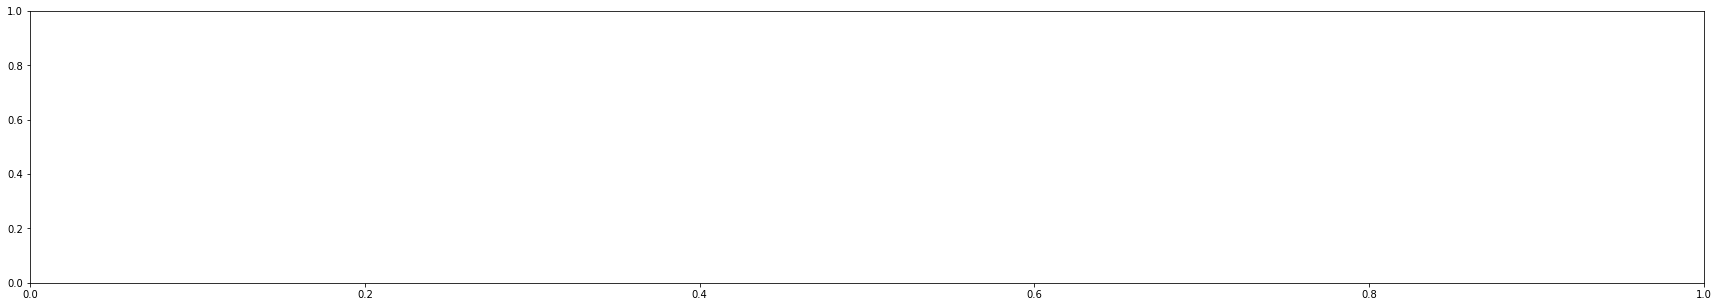

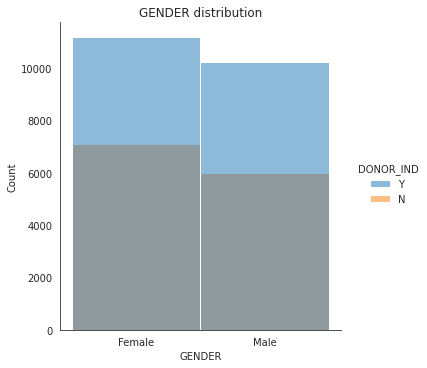

In [ ]:
fig,axs = plt.subplots(figsize=(30,5))
sns.set_style("white")
g = sns.displot(data=df1, x='GENDER', hue='DONOR_IND')
plt.title('GENDER distribution')

In [ ]:
count_donor_by_gender = df1.groupby(['DONOR_IND', 'GENDER']).size().sort_values
count_donor_by_gender

<bound method Series.sort_values of DONOR_IND  GENDER
N          Female     7085
           Male       5990
Y          Female    11190
           Male      10243
dtype: int64>

In [ ]:
group_by_TG_Dono = df1.groupby(['DONOR_IND']).TotalGiving.agg([len])
group_by_TG_Dono

,len
DONOR_IND,
N,13075.0
Y,21433.0


In [ ]:
df1 = df1.drop(columns=['TotalGiving', 'GENDER','PrevFYGiving', 'PrevFY1Giving', 'PrevFY2Giving', 'PrevFY3Giving', 'PrevFY4Giving', 'CurrFYGiving'])

In [ ]:
# Exploratory Data Analysis using latest AI based AutoEDA Package - sweetviz
!pip install sweetviz

In [ ]:
# Importing the package for use
import sweetviz as sv

# Generate the EDA report
Employee_EDA_report = sv.analyze(df1)
# Convert the report to HTML 
Employee_EDA_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

# Downloading the EDA report to local machine
from google.colab import files
files.download("SWEETVIZ_REPORT.html")

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df1.dtypes

AGE                      int64
ALUMNUS_IND             object
PARENT_IND              object
HAS_INVOLVEMENT_IND     object
PREF_ADDRESS_TYPE       object
EMAIL_PRESENT_IND       object
Donor_years              int64
DONOR_IND               object
Consecutive_G          float64
dtype: object

cat_cols = [
'GENDER',
'ALUMNUS_IND',
'PARENT_IND',
'HAS_INVOLVEMENT_IND',
'PREF_ADDRESS_TYPE',
'EMAIL_PRESENT_IND']

In [ ]:
cat_cols = [
'ALUMNUS_IND',
'PARENT_IND',
'HAS_INVOLVEMENT_IND',
'PREF_ADDRESS_TYPE',
'EMAIL_PRESENT_IND']

In [ ]:
# Method 1 - Doing Auto ML with PyCaret
!pip install pycaret --upgrade

In [ ]:
from pycaret.anomaly import *

In [ ]:
anomaly_model = setup(df1)

,Description,Value
0,session_id,6635
1,Original Data,"(34508, 9)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,6
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(34508, 17)"
9,CPU Jobs,-1


In [ ]:
knn = create_model('knn')

In [ ]:
knn_predictions = predict_model(knn, data = df1)
knn_predictions

,AGE,ALUMNUS_IND,PARENT_IND,HAS_INVOLVEMENT_IND,PREF_ADDRESS_TYPE,EMAIL_PRESENT_IND,Donor_years,DONOR_IND,Consecutive_G,Anomaly,Anomaly_Score
0,42,N,N,N,HOME,N,1,Y,0.0,0,0.0
1,33,Y,N,Y,HOME,Y,0,Y,0.0,0,0.0
2,42,N,N,N,HOME,N,1,Y,200.0,0,0.0
3,31,Y,N,Y,HOME,Y,0,N,0.0,0,0.0
4,68,N,N,N,HOME,Y,0,Y,0.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
34503,42,N,N,N,HOME,N,0,N,0.0,0,0.0
34504,24,N,N,N,CAMP,Y,0,Y,0.0,0,0.0
34505,27,Y,N,Y,HOME,Y,0,N,0.0,0,0.0
34506,46,N,N,Y,HOME,Y,1,Y,120.0,0,3.0


In [ ]:
knn_predictions.Anomaly.value_counts()

0    32968
1     1540
Name: Anomaly, dtype: int64

In [ ]:
knn_predictions.shape

(34508, 11)

In [ ]:
df2 = knn_predictions.loc[knn_predictions["Anomaly"] == 0]
df2.shape


(32968, 11)

In [ ]:
df2=df2.drop(columns=['Anomaly', 'Anomaly_Score'])
df2.shape

(32968, 9)

In [ ]:
#To import all Classification related Pycaret libraries
from pycaret.classification import *

In [ ]:
# Setting up the classification ML experiment
classification_model_setup = setup(df2, target = 'DONOR_IND', normalize = True, 
                                   remove_outliers = True,
                                   categorical_features= cat_cols, 
                                   transformation_method='quantile',
                                   train_size = 0.7)

,Description,Value
0,session_id,1025
1,Target,DONOR_IND
2,Target Type,Binary
3,Label Encoded,"N: 0, Y: 1"
4,Original Data,"(32968, 9)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# Running the multiple algorithms
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6804,0.7326,0.4667,0.9997,0.6362,0.4122,0.5093,0.035
nb,Naive Bayes,0.6800,0.7318,0.4692,0.9933,0.6371,0.4108,0.5052,0.031
ada,Ada Boost Classifier,0.6795,0.7287,0.4731,0.9835,0.6387,0.4087,0.4989,0.436
gbc,Gradient Boosting Classifier,0.6784,0.7285,0.4760,0.9741,0.6393,0.4057,0.4922,0.788
lightgbm,Light Gradient Boosting Machine,0.6697,0.7285,0.5197,0.8799,0.6533,0.3755,0.4239,0.246
dt,Decision Tree Classifier,0.6665,0.7243,0.5370,0.8516,0.6585,0.3638,0.4014,0.044
rf,Random Forest Classifier,0.6664,0.7304,0.5505,0.8368,0.6641,0.3597,0.3912,1.117
et,Extra Trees Classifier,0.6661,0.7254,0.5374,0.8504,0.6584,0.3629,0.4001,1.081
lr,Logistic Regression,0.6460,0.7178,0.5591,0.7889,0.6543,0.3126,0.3324,0.444
knn,K Neighbors Classifier,0.6338,0.7059,0.6291,0.7313,0.6719,0.2597,0.2679,0.531


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
# Code snippet 17
# Creating the model with the best algorithm based on the above results
model = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6781,0.7302,0.4627,1.0000,0.6327,0.4084,0.5066
1,0.6922,0.7283,0.4863,1.0000,0.6544,0.4315,0.5245
2,0.6835,0.7402,0.4726,0.9984,0.6415,0.4171,0.5126
3,0.6948,0.7381,0.4909,1.0000,0.6585,0.4358,0.5278
4,0.6816,0.7387,0.4688,1.0000,0.6383,0.4142,0.5110
5,0.6870,0.7346,0.4779,1.0000,0.6468,0.4231,0.5180
6,0.6583,0.7091,0.4296,1.0000,0.6010,0.3765,0.4816
7,0.6720,0.7247,0.4532,0.9983,0.6234,0.3983,0.4979
8,0.6784,0.7430,0.4631,1.0000,0.6330,0.4089,0.5069
9,0.6779,0.7388,0.4623,1.0000,0.6323,0.4081,0.5063


In [ ]:
# Method 2 - Installing the H2O AI Package for Advanced ML and Deep Learning packages
!pip install h2o

     |████████████████████████████████| 175.8 MB 33 kB/s 
  Created wheel for h2o: filename=h2o-3.34.0.7-py2.py3-none-any.whl size=175908084 sha256=0059fb981c13506d2fce7b88fe307f05e08bccfe50e85d586190f3a4085d1007
  Stored in directory: /root/.cache/pip/wheels/df/df/05/1f2ac68a5d9bf38b74f2b8218443b2c00f1a5f4f3154ec11b6
Successfully built h2o


In [ ]:
# Importing into current Working Session
import h2o
from h2o.automl import H2OAutoML

In [ ]:
# Initializing the H2O Server
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpalvu1igo
  JVM stdout: /tmp/tmpalvu1igo/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpalvu1igo/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.7
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_k5xzgf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
df2.AGE.describe()

count    32968.000000
mean        43.108742
std         10.919540
min          1.000000
25%         42.000000
50%         42.000000
75%         42.000000
max        100.000000
Name: AGE, dtype: float64

In [ ]:
min_thresold, max_thresold = df2.AGE.quantile([0.001, 0.999])
min_thresold, max_thresold

(6.0, 94.0)

In [ ]:
df2[df2.AGE < min_thresold]

,AGE,ALUMNUS_IND,PARENT_IND,HAS_INVOLVEMENT_IND,PREF_ADDRESS_TYPE,EMAIL_PRESENT_IND,Donor_years,DONOR_IND,Consecutive_G
234,3,N,N,N,HOME,N,0,N,0.0
1042,4,N,N,N,HOME,N,0,Y,1.0
1050,3,Y,Y,N,HOME,N,0,Y,0.0
1832,4,N,N,N,HOME,Y,0,Y,0.0
2441,3,N,N,N,HOME,N,0,Y,0.0
2456,4,N,N,N,HOME,N,0,N,0.0
3132,1,Y,Y,Y,HOME,N,0,Y,0.0
4107,3,N,N,N,HOME,N,0,N,0.0
6950,5,N,N,N,HOME,N,0,N,0.0
7255,5,N,N,N,HOME,N,0,Y,0.0


In [ ]:
df2[df2.AGE > max_thresold]

,AGE,ALUMNUS_IND,PARENT_IND,HAS_INVOLVEMENT_IND,PREF_ADDRESS_TYPE,EMAIL_PRESENT_IND,Donor_years,DONOR_IND,Consecutive_G
312,96,N,N,N,HOME,N,0,N,0.0
1230,95,N,N,N,HOME,N,0,N,0.0
1282,96,Y,N,N,HOME,N,5,Y,1.0
1863,96,N,N,N,HOME,N,0,Y,0.0
2687,95,Y,N,Y,HOME,N,7,N,0.0
2822,96,N,N,Y,HOME,N,0,Y,0.0
3355,98,N,N,N,HOME,N,0,Y,0.0
5002,98,N,N,N,HOME,N,0,N,0.0
8441,95,N,N,N,HOME,Y,0,Y,100.0
10347,96,Y,N,Y,HOME,N,5,Y,0.0


In [ ]:
#Remove Outliers
df3 = df2[(df2.AGE<max_thresold) & (df2.AGE>min_thresold)]
df3.shape

(32891, 9)

In [ ]:
# Converting Pandas dataframe to H2O dataframe
#df1 = pd.read_csv('')
hf = h2o.H2OFrame(df3)
hf

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


AGE,ALUMNUS_IND,PARENT_IND,HAS_INVOLVEMENT_IND,PREF_ADDRESS_TYPE,EMAIL_PRESENT_IND,Donor_years,DONOR_IND,Consecutive_G
42,N,N,N,HOME,N,1,Y,0
33,Y,N,Y,HOME,Y,0,Y,0
42,N,N,N,HOME,N,1,Y,200
31,Y,N,Y,HOME,Y,0,N,0
68,N,N,N,HOME,Y,0,Y,0
57,N,N,N,HOME,N,0,N,0
42,N,N,N,HOME,Y,3,N,0
42,N,N,N,HOME,N,1,Y,0
42,N,N,Y,HOME,N,0,Y,5
42,N,Y,N,HOME,N,0,Y,0


In [ ]:
# Splitting the data to train and test
splits = hf.split_frame(ratios = [0.8])
# Assigning first split to train variable
train = splits[0]
# Assigning first split to test variable
test = splits[1]

In [ ]:
# Invoking the Auto advanced ML and Deep learning algorithms restricting run time to 60 seconds
aml = H2OAutoML(max_runtime_secs = 60)
# Training using train data and testing with test data
aml.train(y = 'DONOR_IND', training_frame = train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_1_20211223_160440

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.17296130030230755
RMSE: 0.41588616267232015
LogLoss: 0.48529697808527666
Null degrees of freedom: 9943
Residual degrees of freedom: 9941
Null deviance: 13357.163422211857
Residual deviance: 9651.586300159983
AIC: 9657.586300159983
AUC: 0.7780784313725491
AUCPR: 0.8754230181240792
Gini: 0.5561568627450981

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40872742869945156: 


,,N,Y,Error,Rate
0,N,858.0,3086.0,0.7825,(3086.0/3944.0)
1,Y,437.0,5563.0,0.0728,(437.0/6000.0)
2,Total,1295.0,8649.0,0.3543,(3523.0/9944.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.408727,0.759506,285.0
1,max f2,0.302198,0.883958,378.0
2,max f0point5,0.578779,0.820209,109.0
3,max accuracy,0.472271,0.698713,206.0
4,max precision,0.999878,1.000000,0.0
5,max recall,0.218129,1.000000,398.0
6,max specificity,0.999878,1.000000,0.0
7,max absolute_mcc,0.645240,0.512554,81.0
8,max min_per_class_accuracy,0.468999,0.669118,210.0
9,max mean_per_class_accuracy,0.565589,0.740235,117.0



Gains/Lift Table: Avg response rate: 60.34 %, avg score: 60.36 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010056,0.999258,1.657333,1.657333,1.000000,0.999668,1.000000,0.999668,0.016667,0.016667,65.733333,65.733333,0.016667
1,2,0.020012,0.998778,1.657333,1.657333,1.000000,0.999038,1.000000,0.999355,0.016500,0.033167,65.733333,65.733333,0.033167
2,3,0.030068,0.998035,1.657333,1.657333,1.000000,0.998366,1.000000,0.999024,0.016667,0.049833,65.733333,65.733333,0.049833
3,4,0.040024,0.997649,1.657333,1.657333,1.000000,0.997873,1.000000,0.998738,0.016500,0.066333,65.733333,65.733333,0.066333
4,5,0.050080,0.997324,1.657333,1.657333,1.000000,0.997467,1.000000,0.998483,0.016667,0.083000,65.733333,65.733333,0.083000
5,6,0.100060,0.996060,1.657333,1.657333,1.000000,0.996602,1.000000,0.997543,0.082833,0.165833,65.733333,65.733333,0.165833
6,7,0.151348,0.995222,1.657333,1.657333,1.000000,0.995589,1.000000,0.996881,0.085000,0.250833,65.733333,65.733333,0.250833
7,8,0.204244,0.994478,1.657333,1.657333,1.000000,0.994770,1.000000,0.996334,0.087667,0.338500,65.733333,65.733333,0.338500
8,9,0.300382,0.584362,1.579321,1.632365,0.952929,0.934289,0.984935,0.976477,0.151833,0.490333,57.932078,63.236514,0.478924
9,10,0.409191,0.480742,0.903722,1.438609,0.545287,0.512438,0.868027,0.853083,0.098333,0.588667,-9.627850,43.860932,0.452510




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.1782237863752865
RMSE: 0.42216559117872987
LogLoss: 0.4968537898611188
Null degrees of freedom: 26179
Residual degrees of freedom: 26177
Null deviance: 35148.69547423078
Residual deviance: 26015.26443712818
AIC: 26021.26443712818
AUC: 0.7399112733535825
AUCPR: 0.8560163315735384
Gini: 0.47982254670716507

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2211796751429594: 


,,N,Y,Error,Rate
0,N,10.0,10352.0,0.999,(10352.0/10362.0)
1,Y,5.0,15813.0,0.0003,(5.0/15818.0)
2,Total,15.0,26165.0,0.3956,(10357.0/26180.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.221180,0.753305,393.0
1,max f2,0.169952,0.884161,399.0
2,max f0point5,0.743389,0.818358,67.0
3,max accuracy,0.604254,0.682888,105.0
4,max precision,0.999823,1.000000,0.0
5,max recall,0.169952,1.000000,399.0
6,max specificity,0.999823,1.000000,0.0
7,max absolute_mcc,0.907303,0.512675,63.0
8,max min_per_class_accuracy,0.462348,0.655472,212.0
9,max mean_per_class_accuracy,0.743389,0.737037,67.0



Gains/Lift Table: Avg response rate: 60.42 %, avg score: 60.42 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010008,0.999460,1.655076,1.655076,1.000000,0.999686,1.000000,0.999686,0.016563,0.016563,65.507650,65.507650,0.016563
1,2,0.020015,0.999018,1.655076,1.655076,1.000000,0.999236,1.000000,0.999461,0.016563,0.033127,65.507650,65.507650,0.033127
2,3,0.030023,0.998716,1.655076,1.655076,1.000000,0.998850,1.000000,0.999257,0.016563,0.049690,65.507650,65.507650,0.049690
3,4,0.040031,0.998531,1.655076,1.655076,1.000000,0.998616,1.000000,0.999097,0.016563,0.066254,65.507650,65.507650,0.066254
4,5,0.050000,0.998345,1.655076,1.655076,1.000000,0.998433,1.000000,0.998965,0.016500,0.082754,65.507650,65.507650,0.082754
5,6,0.100000,0.997719,1.655076,1.655076,1.000000,0.998013,1.000000,0.998489,0.082754,0.165508,65.507650,65.507650,0.165508
6,7,0.150000,0.997130,1.655076,1.655076,1.000000,0.997465,1.000000,0.998148,0.082754,0.248261,65.507650,65.507650,0.248261
7,8,0.200000,0.986744,1.655076,1.655076,1.000000,0.992596,1.000000,0.996760,0.082754,0.331015,65.507650,65.507650,0.331015
8,9,0.300000,0.598288,1.545075,1.618409,0.933537,0.934698,0.977846,0.976073,0.154508,0.485523,54.507523,61.840941,0.468731
9,10,0.400000,0.484446,0.729549,1.396194,0.440794,0.523740,0.843583,0.862989,0.072955,0.558478,-27.045138,39.619421,0.400400


In [ ]:
# Displaying the best algorithm scores
aml.leaderboard.head(20)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20211223_160440,0.739911,0.496854,0.856016,0.499676,0.422166,0.178224
XGBoost_1_AutoML_1_20211223_160440,0.739826,0.49732,0.856006,0.499935,0.422034,0.178113
GBM_1_AutoML_1_20211223_160440,0.736547,0.544794,0.854403,0.5,0.43292,0.18742
GLM_1_AutoML_1_20211223_160440,0.69893,0.588542,0.820403,0.5,0.454581,0.206644


In [ ]:
# Getting the prediction metrics
perf = aml.leader.model_performance(test)
# Displaying the performance metrics
perf


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.18138380259896802
RMSE: 0.42589177334032646
LogLoss: 0.5039453338200344
Null degrees of freedom: 6710
Residual degrees of freedom: 6708
Null deviance: 9024.01294714197
Residual deviance: 6763.954270532501
AIC: 6769.954270532501
AUC: 0.7261990328690014
AUCPR: 0.8471899020400686
Gini: 0.4523980657380029

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2181875810671096: 


,,N,Y,Error,Rate
0,N,2.0,2671.0,0.9993,(2671.0/2673.0)
1,Y,0.0,4038.0,0.0,(0.0/4038.0)
2,Total,2.0,6709.0,0.398,(2671.0/6711.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.218188,0.751466,397.0
1,max f2,0.218188,0.883163,397.0
2,max f0point5,0.746811,0.812251,75.0
3,max accuracy,0.746811,0.677544,75.0
4,max precision,0.999910,1.000000,0.0
5,max recall,0.218188,1.000000,397.0
6,max specificity,0.999910,1.000000,0.0
7,max absolute_mcc,0.746811,0.506119,75.0
8,max min_per_class_accuracy,0.468998,0.601197,211.0
9,max mean_per_class_accuracy,0.746811,0.731982,75.0



Gains/Lift Table: Avg response rate: 60.17 %, avg score: 60.09 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010133,0.999209,1.661961,1.661961,1.000000,0.999592,1.000000,0.999592,0.016840,0.016840,66.196137,66.196137,0.016840
1,2,0.020116,0.998782,1.661961,1.661961,1.000000,0.999014,1.000000,0.999305,0.016592,0.033432,66.196137,66.196137,0.033432
2,3,0.030100,0.997937,1.661961,1.661961,1.000000,0.998332,1.000000,0.998983,0.016592,0.050025,66.196137,66.196137,0.050025
3,4,0.040083,0.997516,1.661961,1.661961,1.000000,0.997731,1.000000,0.998671,0.016592,0.066617,66.196137,66.196137,0.066617
4,5,0.050067,0.997221,1.661961,1.661961,1.000000,0.997364,1.000000,0.998410,0.016592,0.083210,66.196137,66.196137,0.083210
5,6,0.100134,0.995980,1.661961,1.661961,1.000000,0.996535,1.000000,0.997472,0.083210,0.166419,66.196137,66.196137,0.166419
6,7,0.150052,0.995094,1.661961,1.661961,1.000000,0.995517,1.000000,0.996822,0.082962,0.249381,66.196137,66.196137,0.249381
7,8,0.200119,0.994438,1.661961,1.661961,1.000000,0.994724,1.000000,0.996297,0.083210,0.332590,66.196137,66.196137,0.332590
8,9,0.300700,0.576943,1.445291,1.589487,0.869630,0.912824,0.956392,0.968376,0.145369,0.477959,44.529085,58.948733,0.445038
9,10,0.409328,0.480742,0.743209,1.364902,0.447188,0.510684,0.821260,0.846914,0.080733,0.558692,-25.679094,36.490165,0.375004
